In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [481]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=';')

In [566]:
df.head(13)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passasjerer_I_Bussen,Delay_Avgang,Delay_Ankomst,Faktisk_Differanse_Turlengde,Gjennomsnittlig_Forsinkelse_Paa_Linjen
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-21 10:53:59,2021-09-21 10:53:00,2021-09-21 10:53:00,112,5,107,0 days 00:00:59,0 days 00:00:53,0 days 00:00:06,0 days 00:02:36
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-21 13:12:26,2021-09-21 13:12:00,2021-09-21 13:12:00,112,5,107,0 days 00:00:26,0 days 00:00:20,0 days 00:00:06,0 days 00:02:36
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-21 10:19:21,2021-09-21 10:19:00,2021-09-21 10:19:00,112,6,106,0 days 00:00:21,0 days 00:00:00,0 days 00:00:25,0 days 00:02:36
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-21 13:52:26,2021-09-21 13:51:00,2021-09-21 13:51:00,112,10,102,0 days 00:01:26,0 days 00:01:04,0 days 00:00:22,0 days 00:02:36
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-21 07:34:53,2021-09-21 07:33:00,2021-09-21 07:33:00,112,10,102,0 days 00:01:53,0 days 00:01:13,0 days 00:00:40,0 days 00:02:36
5,3110-2020-08-01T16:16:00+02:00,2020-01-08,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,2021-09-21 17:23:23,2021-09-21 17:16:00,2021-09-21 17:16:00,151,8,143,0 days 00:07:23,0 days 00:06:56,0 days 00:00:27,0 days 00:02:35
6,15010-2020-07-28T13:09:00+02:00,2020-07-28,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,...,2021-09-21 13:19:05,2021-09-21 13:17:00,2021-09-21 13:17:00,112,1,111,0 days 00:02:05,0 days 00:02:00,0 days 00:00:05,0 days 00:02:36
7,15003-2020-07-27T06:18:00+02:00,2020-07-27,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,...,2021-09-21 06:20:29,2021-09-21 06:20:00,2021-09-21 06:20:00,112,-1,113,0 days 00:00:29,0 days 00:00:24,0 days 00:00:05,0 days 00:02:36
8,21002-2020-08-16T14:33:00+02:00,2020-08-16,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,...,2021-09-21 15:10:34,2021-09-21 15:09:00,2021-09-21 15:09:00,112,2,110,0 days 00:01:34,0 days 00:01:12,0 days 00:00:22,0 days 00:02:36
9,15002-2020-08-13T18:09:00+02:00,2020-08-13,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,...,2021-09-21 18:38:19,2021-09-21 18:29:00,2021-09-21 18:29:00,112,4,108,0 days 00:09:19,0 days 00:08:41,0 days 00:00:38,0 days 00:02:36


In [483]:
df["Passasjerer_I_Bussen"] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]

In [ ]:
# df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')

In [485]:
counter = 0

for index, row in df.iterrows():
    #print(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].split(":")[0])
    #print(row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].split(":")[0])
    #print(row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].split(":")[0])
    #print(row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].split(":")[0])
    #print(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])
    if len(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']) == 1 or len(row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']) == 1 or len(row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']) == 1 or len(row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']) == 1:
        df.drop(labels=index, inplace=True)
        #print(row)
    else:
        if (int(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].split(":")[0]) >= 24):
            df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = str("0" + str(int(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].split(":")[0])- 24)) + row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'][2:]
            counter = counter+1
        if (int(row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].split(":")[0]) >= 24):
            df.loc[index, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = str("0" + str(int(row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].split(":")[0])- 24)) + row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'][2:]
            counter = counter+1
        if (int(row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].split(":")[0]) >= 24):
            df.loc[index, 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = str("0" + str(int(row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].split(":")[0])- 24)) + row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'][2:]
            counter = counter+1
        if (int(row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].split(":")[0]) >= 24):
            df.loc[index, 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = str("0" + str(int(row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].split(":")[0])- 24)) + row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'][2:]
            counter = counter+1
        if counter > 0:
            row['Dato'] = row['Dato'] + np.timedelta64(1,'D')


In [486]:
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')


In [487]:
df["Delay_Avgang"] = df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"]

In [488]:
df["Delay_Ankomst"] = df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]

In [489]:
for index, row in df.iterrows():
    if row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']:
        df.loc[index, 'Delay_Avgang'] = df.loc[index, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']-df.loc[index, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']
    if row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']:
        df.loc[index, 'Delay_Ankomst'] = df.loc[index, 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']-df.loc[index, 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']


In [490]:
df["Faktisk_Differanse_Turlengde"] = (df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"] - df["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"]) - (df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"] - df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"])

In [491]:
#df.sort_values("Faktisk_Differanse_Turlengde")

In [528]:
tempData = df.groupby(["Linjenavn"])["Delay_Avgang"].mean().reset_index()
#print(type(tempData["Linjenavn"][0]))


for index, row in df.iterrows():
    for linjer in range(len(tempData)):
        if df.loc[index, "Linjenavn"] == tempData["Linjenavn"][linjer]:
            #print(df.loc[index, "Gjennomsnittlig_Forsinkelse_Paa_Linjen"])
            #print()
            df.loc[index, 'Gjennomsnittlig_Forsinkelse_Paa_Linjen'] = datetime.timedelta(seconds=tempData["Delay_Avgang"][linjer].seconds)
    
#df["Gjennomsnittlig_Forsinkelse_Paa_Linjen"] = df.groupby(["Linjenavn"])["Delay_Avgang"].mean()

In [527]:
#print(datetime.timedelta(seconds=tempData["Delay_Avgang"][0].seconds))


0:03:41


In [478]:
#print(str(df["Gjennomsnittlig_Forsinkelse_Paa_Linjen"]))
#for index, row in df.iterrows():
    #print(str(row['Gjennomsnittlig_Forsinkelse_Paa_Linjen'])[:15])
    #df.loc[index, 'Gjennomsnittlig_Forsinkelse_Paa_Linjen'] = str(row['Gjennomsnittlig_Forsinkelse_Paa_Linjen'])[:15]
 #   df.loc[index, 'Gjennomsnittlig_Forsinkelse_Paa_linjen'] = pd.to_datetime(str(row['Gjennomsnittlig_Forsinkelse_Paa_Linjen'])[:15], errors='coerce')


In [629]:
#df['Passasjerer_I_Bussen'].plot(kind="box", label="Gjennomsnittlig fordeling av passasjerer i en buss")

In [608]:
plot_df_Linje_Forsinkelse = df["Gjennomsnittlig_Forsinkelse_Paa_Linjen"].dt.total_seconds()

In [628]:
#ax = plot_df_Linje_Forsinkelse.plot(kind="box", label='Gjennomsnittlig forsinkelse på busser i sekunder')
#ax.set_xlabel("Gjennomsnittlig forsinkelse i sekunder")


In [601]:
#df.plot.bar(x=df["Passasjerer_I_Bussen"], y=df["Linjenavn"])
#df[['Passasjerer_I_Bussen','Linjenavn']].plot(kind='bar')

#df.plot(x="Linjenavn", y=["Passasjerer_I_Bussen"], kind="bar",figsize=(9,8))


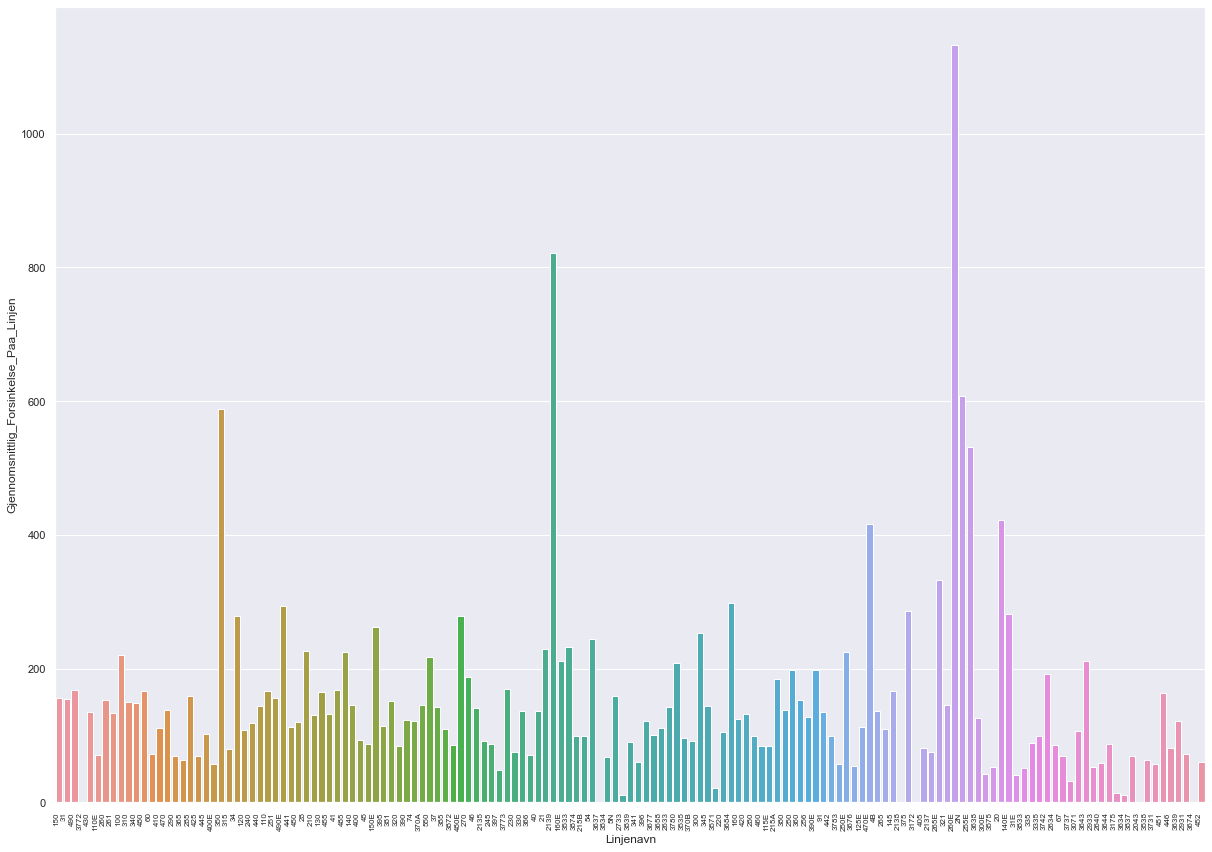

In [605]:
sns.set(rc={'figure.figsize':(17,12)})
ax = sns.barplot(x="Linjenavn", y=plot_df_Linje_Forsinkelse, data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.tight_layout()
plt.show()


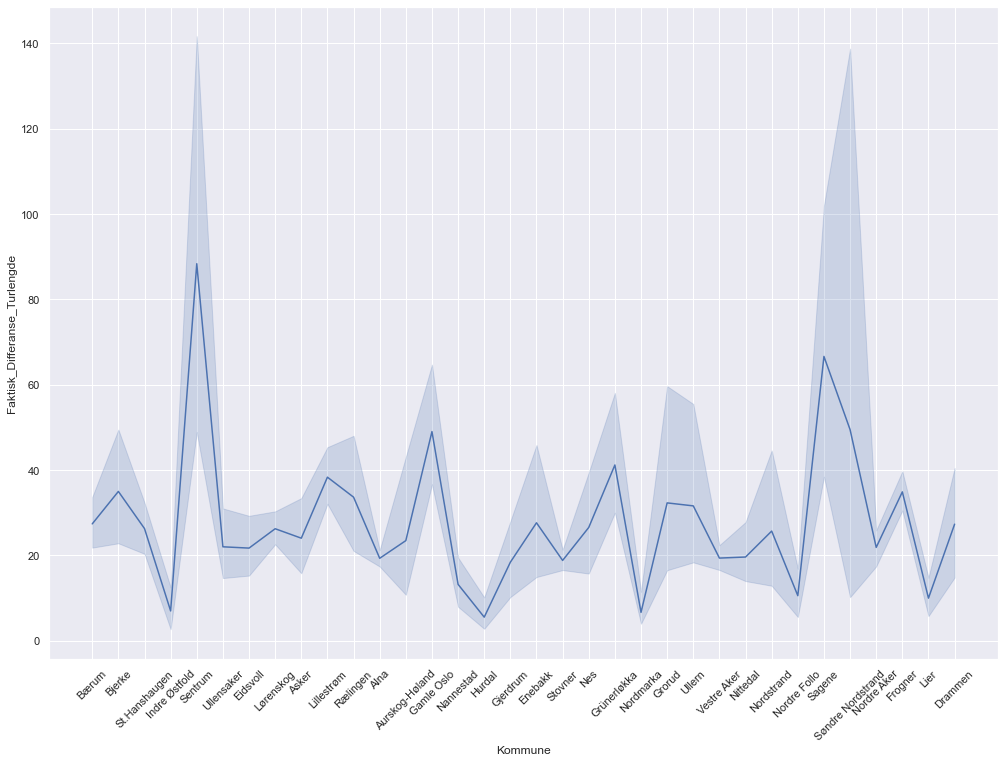

In [624]:
sns.set(rc={'figure.figsize':(17,12)})

ax = sns.lineplot(x='Kommune', y=df['Faktisk_Differanse_Turlengde'].dt.total_seconds(), data=df)
ax.tick_params(axis='x', rotation=45)



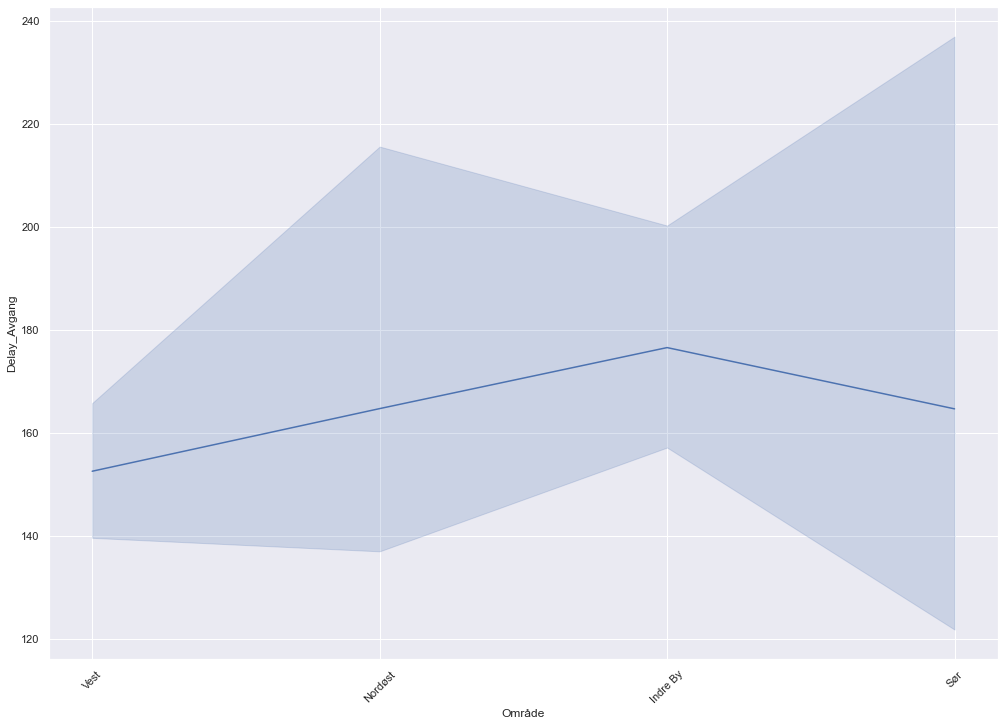

In [636]:
sns.set(rc={'figure.figsize':(17,12)})

ax = sns.lineplot(x='Område', y=df['Delay_Avgang'].dt.total_seconds(), data=df)
ax.tick_params(axis='x', rotation=45)




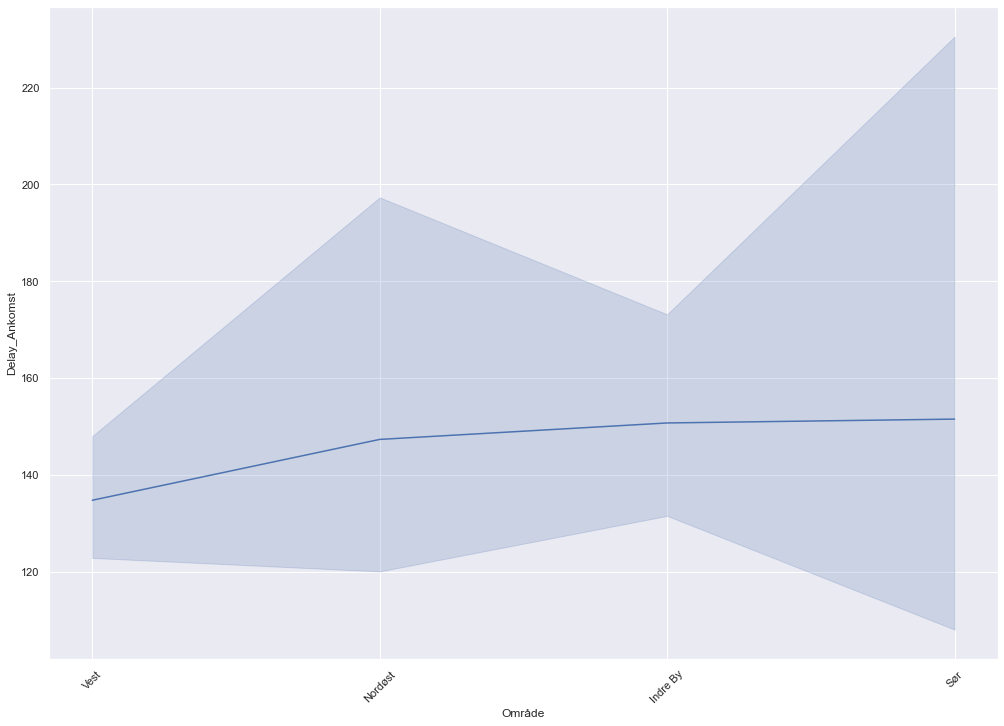

In [637]:
sns.set(rc={'figure.figsize':(17,12)})

ax = sns.lineplot(x='Område', y=df['Delay_Ankomst'].dt.total_seconds(), data=df)
ax.tick_params(axis='x', rotation=45)


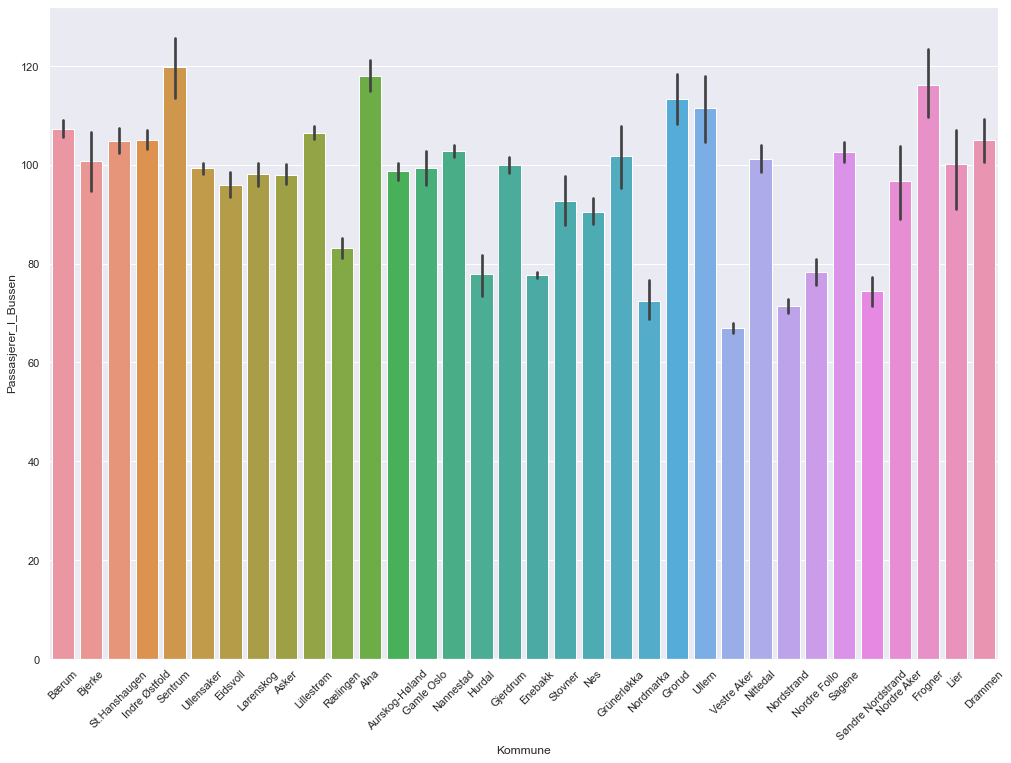

In [631]:
ax = sns.barplot(x='Kommune', y='Passasjerer_I_Bussen', data=df)

ax.tick_params(axis='x', rotation=45)
